## 使用 库ResNet18

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms


# 数据导入
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])
BatchSize = 64
trainset = torchvision.datasets.MNIST(root='G:/dataset/', train=True, download=False, transform=transform)
testset = torchvision.datasets.MNIST(root='G:/dataset/', train=False, download=False, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BatchSize, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=BatchSize, shuffle=False)


In [3]:
# import torchvision.transforms as transforms
# from torchvision.datasets import MNIST
# import os
# 
# # 定义数据预处理
# transform = transforms.Compose([
#     transforms.ToTensor(),  # 将图片转换为Tensor
# ])
# 
# # 加载MNIST测试集
# dataset = MNIST(root='G:/dataset/', train=True, download=False)
# 
# # dataset = MNIST(root='./data', train=True, download=True)
# # save_dir = 'mnist_train_images'
# 
# # 创建保存图片的文件夹
# save_dir = 'G:/dataset/mnist_train_images'
# 
# if not os.path.exists(save_dir):
#     os.makedirs(save_dir)
# 
# # 将MNIST测试集中的图片保存为文件
# for i in range(len(dataset)):
#     if i%1000 == 0:
#         print(f'{i}/{len(dataset)}')
#     image, label = dataset[i]
#     image = transform(image)  # 使用数据预处理步骤
#     image = transforms.ToPILImage()(image)  # 将Tensor转换为PIL图片
#     image.save(os.path.join(save_dir, f'{i:05d}.jpg'))


0/60000
1000/60000
2000/60000
3000/60000
4000/60000
5000/60000
6000/60000
7000/60000
8000/60000
9000/60000
10000/60000
11000/60000
12000/60000
13000/60000
14000/60000
15000/60000
16000/60000
17000/60000
18000/60000
19000/60000
20000/60000
21000/60000
22000/60000
23000/60000
24000/60000
25000/60000
26000/60000
27000/60000
28000/60000
29000/60000
30000/60000
31000/60000
32000/60000
33000/60000
34000/60000
35000/60000
36000/60000
37000/60000
38000/60000
39000/60000
40000/60000
41000/60000
42000/60000
43000/60000
44000/60000
45000/60000
46000/60000
47000/60000
48000/60000
49000/60000
50000/60000
51000/60000
52000/60000
53000/60000
54000/60000
55000/60000
56000/60000
57000/60000
58000/60000
59000/60000


In [4]:
import torch
from torchvision.models import resnet18
import torch.nn as nn
import torchvision.models as models


# 创建自定义的ResNet-18模型类
class CustomResNet18(nn.Module):
    def __init__(self):
        super(CustomResNet18, self).__init__()
        self.resnet18 = models.resnet18(weights=None)
        self.resnet18.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)  # 修改输入通道数为1
        num_ftrs = self.resnet18.fc.in_features
        self.resnet18.fc = nn.Linear(num_ftrs, 10)  # 修改输出大小为10（适应10个类别）

    def forward(self, x):
        x = self.resnet18.conv1(x)
        x = self.resnet18.bn1(x)
        x = self.resnet18.relu(x)
        x = self.resnet18.maxpool(x)

        x = self.resnet18.layer1(x)
        x = self.resnet18.layer2(x)
        x = self.resnet18.layer3(x)
        x = self.resnet18.layer4(x)

        x = self.resnet18.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.resnet18.fc(x)

        return x
    
# # 创建自定义ResNet-18模型实例
# custom_resnet18 = CustomResNet18()


In [7]:
# import torch
# import torchvision
# import torchvision.transforms as transforms
# import torch.nn as nn
# import torch.optim as optim
# 
# # 数据处理
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, ), (0.5, ))
# ])
# 
# trainset = torchvision.datasets.MNIST(root='G:/dataset/', train=True, download=False, transform=transform)
# trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)
# 
# 
# # 创建自定义ResNet-18模型实例
# custom_resnet18 = CustomResNet18()
# 
# # 使用GPU进行训练
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# custom_resnet18.to(device)
# 
# # 损失函数和优化器
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(custom_resnet18.parameters(), lr=0.001, momentum=0.9)
# #Adam优化
# # optimizer = torch.optim.Adam(custom_resnet18.parameters(), lr=0.001)
# 
# # 训练模型
# for epoch in range(1):  # 遍历数据集多次
#     running_loss = 0.0
#     for i, data in enumerate(trainloader, 0):
#         inputs, labels = data[0].to(device), data[1].to(device)
#         optimizer.zero_grad()
#         
#         outputs = custom_resnet18(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
# 
#         running_loss += loss.item()
#         if i % 200 == 199:    # 每200个batch打印一次
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             running_loss = 0.0
#         
#         if i==2000:
#             break
# 
# print('Finished Training')
# 
# # 保存训练好的模型
# PATH = './model_save/mnist_resnet18.pth'
# torch.save(custom_resnet18.state_dict(), PATH)


[1,   200] loss: 0.049
[1,   400] loss: 0.018
[1,   600] loss: 0.014
[1,   800] loss: 0.012
[1,  1000] loss: 0.010
[1,  1200] loss: 0.009
[1,  1400] loss: 0.010
[1,  1600] loss: 0.008
[1,  1800] loss: 0.007
Finished Training


In [8]:
import torch
import torchvision.transforms as transforms
import torchvision


# 使用GPU进行训练
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# 创建自定义ResNet-18模型实例
custom_resnet18 = CustomResNet18().to(device)
custom_resnet18.load_state_dict(torch.load('./model_save/mnist_resnet18.pth'))
custom_resnet18.eval()

# 数据处理
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

testset = torchvision.datasets.MNIST(root='G:/dataset/', train=False, download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = custom_resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('模型准确率: %d %%' % (100 * correct / total))

cpu
模型准确率: 98 %


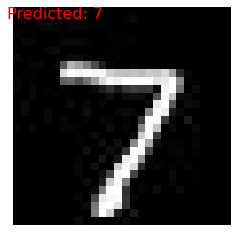

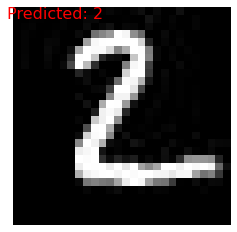

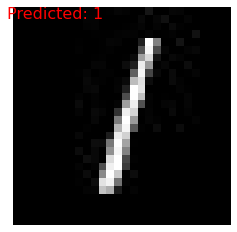

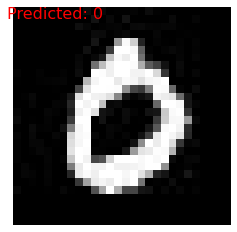

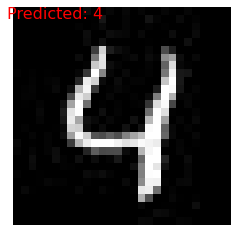

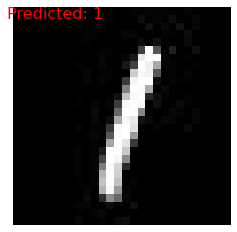

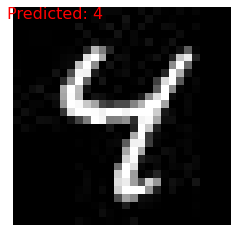

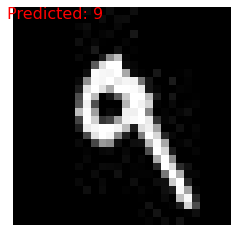

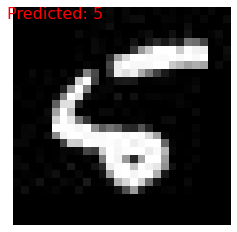

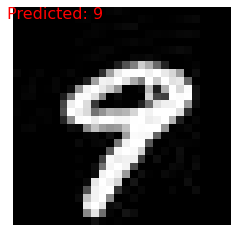

In [10]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 加载自定义的ResNet18模型
model = CustomResNet18()
model.load_state_dict(torch.load('./model_save/mnist_resnet18.pth'))
model.eval()

# 读取前十张图片进行预测
for i in range(10):
    image_path = f'G:/dataset/mnist_test_images\\{i:05d}.jpg'
    image = Image.open(image_path)
    image = image.convert('L')  # 转换为灰度图
    # print(image.size)
    # plt.imshow(image, cmap='gray')
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    image = transform(image).unsqueeze(0)

    # 进行模型预测
    with torch.no_grad():
        output = model(image)
        _, predicted = torch.max(output, 1)

    # 在原图片右上角显示预测结果
    image = np.array(image.squeeze(0) * 0.5 + 0.5)  # 将图像数据转换为numpy数组，并反归一化
    image = np.reshape(image,(28,28))
    plt.imshow(image, cmap='gray')
    plt.text(5, 1, f'Predicted: {predicted.item()}', color='red', fontsize=16, ha='center')
    plt.axis('off')
    plt.show()
